**COSC 44323- Emerging Technologies in Information Technology**

**Mini Project 01 - Sinhala Character Recognition System using
Convolutional Neural Networks (CNN) - Two Characters**

**Student Number: PS/2019/091**

**Student Name: K. G. M. Pinsara**


---









#Importing Relevant Libraries

In [152]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Mounting the Google Drive

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Changing the Current Working Directory

In [154]:
os.chdir("/content/drive/My Drive/Colab_Data_Files/Ga_vs_Pa/")
os.getcwd()

'/content/drive/My Drive/Colab_Data_Files/Ga_vs_Pa'

#Loading and Displaying an Image from the Dataset

In [155]:
#Specifing the path to the image and loading the image
dir_path = 'Training/Ga'
random_img = random.choice(os.listdir(dir_path))
random_img_path = os.path.join(dir_path, random_img)
img = image.load_img(random_img_path)

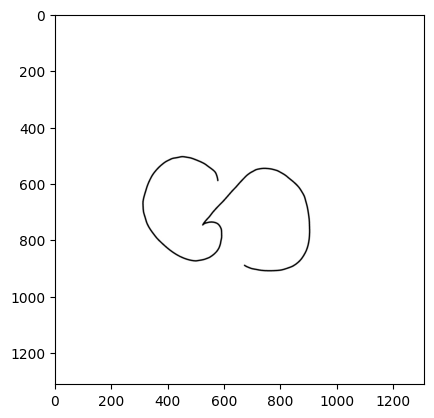

In [156]:
#Displaying the image using matplotlib
plt.imshow(img)

#Checking the Initial Shape of the Data

In [157]:
#Checking the Initial Shape of the Data
print("Initial shape of a single image:", cv2.imread(random_img_path).shape)

Initial shape of a single image: (1312, 1312, 3)


In [158]:
#Checking the 3D matrix of the Image
cv2.imread(random_img_path)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

#Data Preprocessing

##Generating Training Dataset using ImageDataGenerator, Rescaling and Labeling

In [159]:
train = ImageDataGenerator(rescale = 1/255)

In [160]:
train_dataset = train.flow_from_directory('Training/',
                                          target_size = (500,500),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [161]:
#Checking the labels generated by the above function
train_dataset.class_indices

{'Ga': 0, 'Pa': 1}

In [162]:
#Checking the classes of the training dataset
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##Checking the Shape of Data after Preprocessing

In [163]:
#Checking the shape of 'next' batch of data
train_images,train_labels = next(train_dataset)

print("Shape of a single image:", train_images[0].shape)
print("Batch shape:", train_images.shape)

Shape of a single image: (500, 500, 3)
Batch shape: (3, 500, 500, 3)


In [164]:
print("3D matrix of a single image after rescaling:", train_images[0])

3D matrix of a single image after rescaling: [[[0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


##Checking the Images after Rescaling

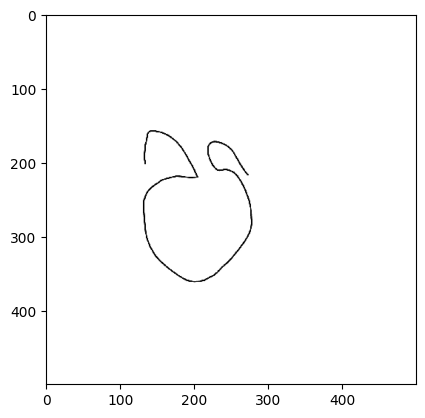

In [165]:
rescaled_image = train_images[0]
plt.imshow(rescaled_image)

#Specifying the CNN Architecture

In [166]:
# Creating a Sequential model

model = Sequential([
          #Convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
          Conv2D(16,(3,3), activation = 'relu', input_shape = (500,500,3)),
          MaxPooling2D(2,2),

          #Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
          Conv2D(32,(3,3), activation = 'relu'),
          MaxPooling2D(2,2),

          #Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
          Conv2D(64, (3,3), activation = 'relu'),
          MaxPooling2D(2,2),

          #Flatten layer to convert 3D feature maps to 1D feature vectors
          Flatten(),

          #Dense(fully connected) layer with 512 units and ReLU activation
          Dense(512, activation = 'relu'),
          #Output layer with 1 unit and sigmoid activation for binary classification
          Dense(1, activation = 'sigmoid')
])

#Specifying the Training of the Model

In [167]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#Training the Model

In [168]:
model_fit = model.fit(train_dataset, steps_per_epoch = 5, epochs = 15, batch_size = 5)

Epoch 1/15
5/5 [==============================] - 17s 2s/step - loss: 13.7513 - accuracy: 0.4000
Epoch 2/15
5/5 [==============================] - 11s 2s/step - loss: 1.0051 - accuracy: 0.5333
Epoch 3/15
5/5 [==============================] - 11s 2s/step - loss: 0.7686 - accuracy: 0.6667
Epoch 4/15
5/5 [==============================] - 11s 2s/step - loss: 0.5289 - accuracy: 0.7333
Epoch 5/15
5/5 [==============================] - 11s 2s/step - loss: 0.4108 - accuracy: 0.8667
Epoch 6/15
5/5 [==============================] - 11s 2s/step - loss: 0.3174 - accuracy: 0.9286
Epoch 7/15
5/5 [==============================] - 11s 2s/step - loss: 0.3128 - accuracy: 0.9333
Epoch 8/15
5/5 [==============================] - 11s 2s/step - loss: 0.1085 - accuracy: 0.9286
Epoch 9/15
5/5 [==============================] - 11s 2s/step - loss: 0.0118 - accuracy: 1.0000
Epoch 10/15
5/5 [==============================] - 11s 2s/step - loss: 0.0276 - accuracy: 1.0000
Epoch 11/15
5/5 [=====================

#Model evaluation

In [169]:
model.evaluate(train_dataset)

27/27 [==============================] - 5s 169ms/step - loss: 0.1986 - accuracy: 0.9500


[0.1985529512166977, 0.949999988079071]

#Testing Sample Data

In [170]:
#Checking the labels generated
train_dataset.class_indices

{'Ga': 0, 'Pa': 1}

##Testing a Random Image

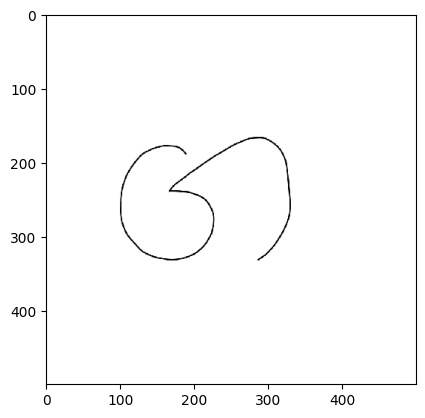

1/1 [==============================] - 0s 91ms/step
The image '{random_image_name}' is classified as Class Ga


In [180]:
dir_path = 'Testing/'
testing_files = os.listdir(dir_path)

random_image_name = random.choice(testing_files)
random_image_path = os.path.join(dir_path, random_image_name)
img = image.load_img(random_image_path, target_size=(500, 500))
plt.imshow(img)
plt.show()
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to match the model's expected input shape

# Normalize the image data
img_array /= 255.0

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Interpret the prediction
if prediction[0][0] >= 0.5:
    print("The image '{random_image_name}' is classified as Class Pa")
else:
    print("The image '{random_image_name}' is classified as Class Ga")


##Testing all the Test Data

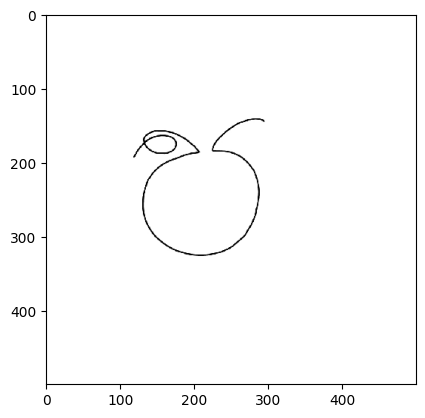

1/1 [==============================] - 0s 85ms/step
This is Letter 'Pa' in Sinhala


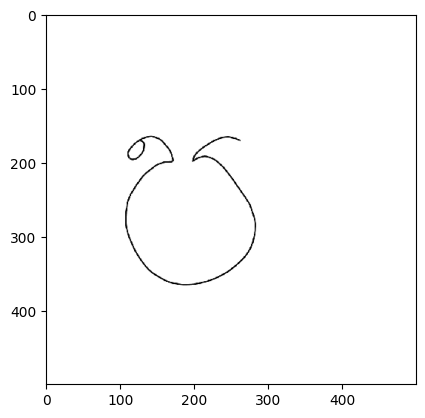

1/1 [==============================] - 0s 82ms/step
This is Letter 'Pa' in Sinhala


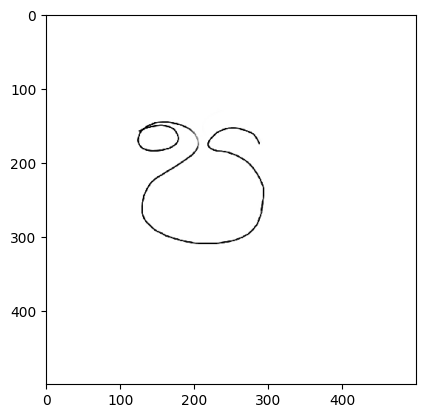

1/1 [==============================] - 0s 82ms/step
This is Letter 'Pa' in Sinhala


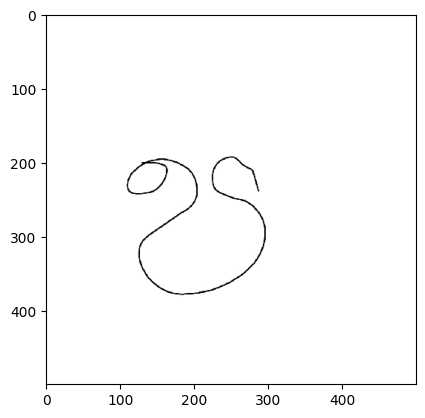

1/1 [==============================] - 0s 83ms/step
This is Letter 'Ga' in Sinhala


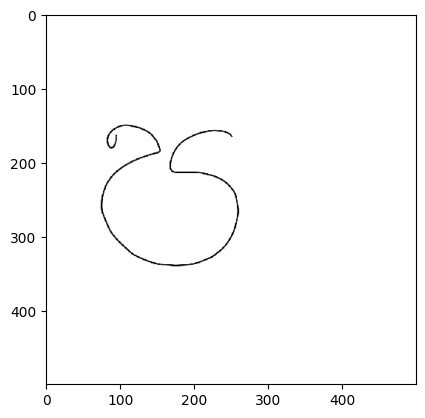

1/1 [==============================] - 0s 82ms/step
This is Letter 'Ga' in Sinhala


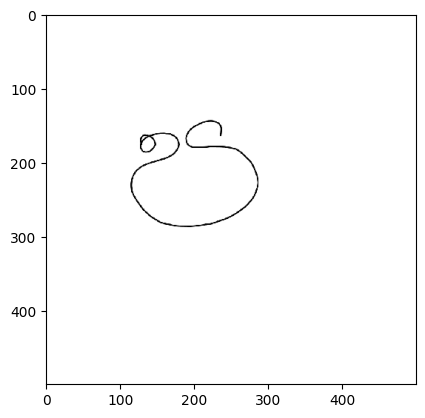

1/1 [==============================] - 0s 84ms/step
This is Letter 'Pa' in Sinhala


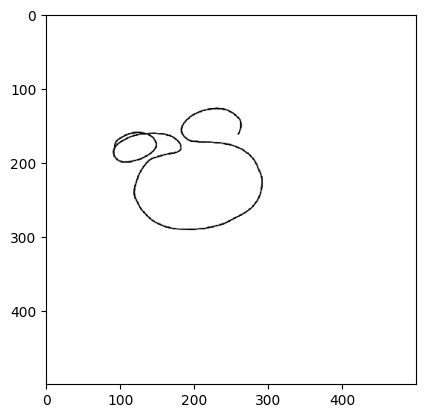

1/1 [==============================] - 0s 89ms/step
This is Letter 'Pa' in Sinhala


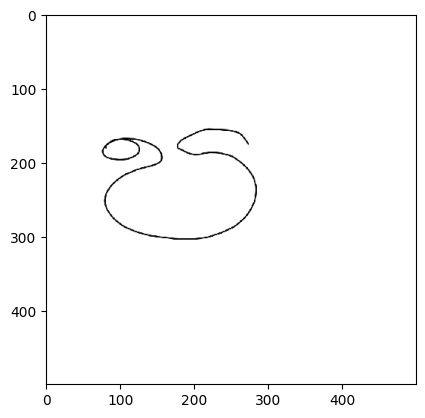

1/1 [==============================] - 0s 88ms/step
This is Letter 'Pa' in Sinhala


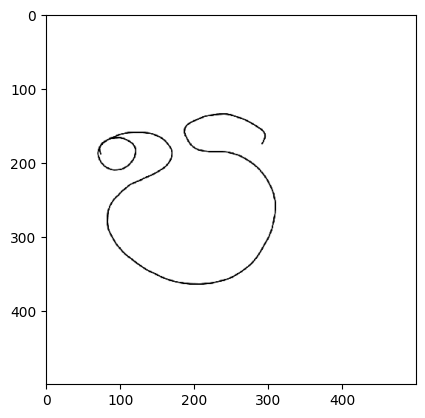

1/1 [==============================] - 0s 85ms/step
This is Letter 'Pa' in Sinhala


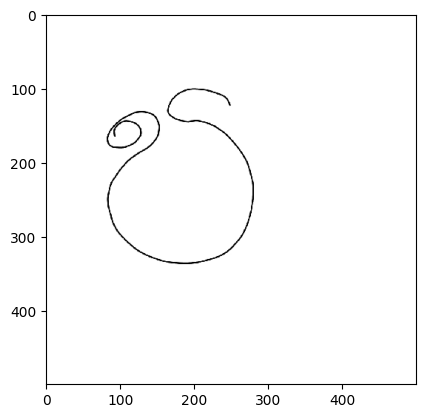

1/1 [==============================] - 0s 85ms/step
This is Letter 'Pa' in Sinhala


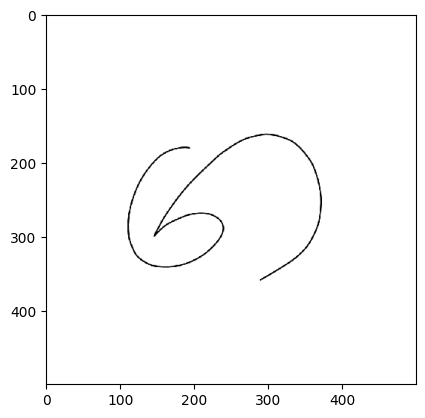

1/1 [==============================] - 0s 115ms/step
This is Letter 'Ga' in Sinhala


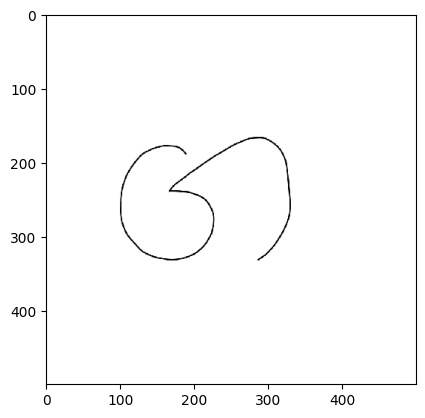

1/1 [==============================] - 0s 109ms/step
This is Letter 'Ga' in Sinhala


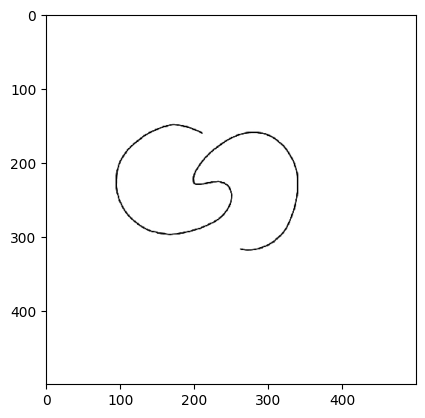

1/1 [==============================] - 0s 120ms/step
This is Letter 'Ga' in Sinhala


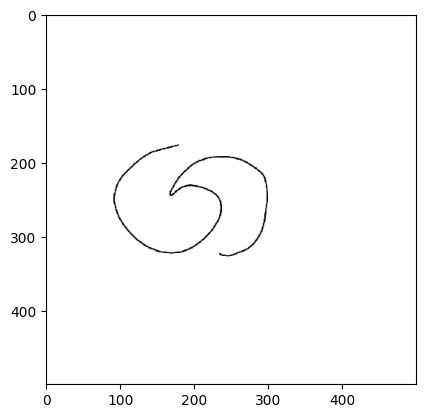

1/1 [==============================] - 0s 108ms/step
This is Letter 'Ga' in Sinhala


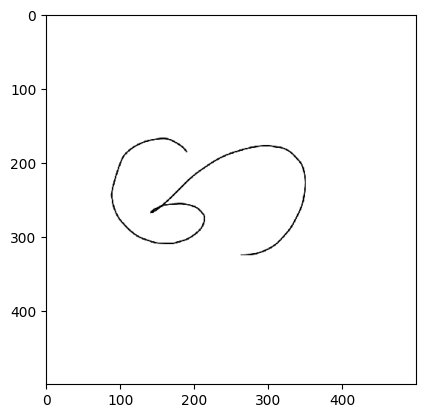

1/1 [==============================] - 0s 84ms/step
This is Letter 'Ga' in Sinhala


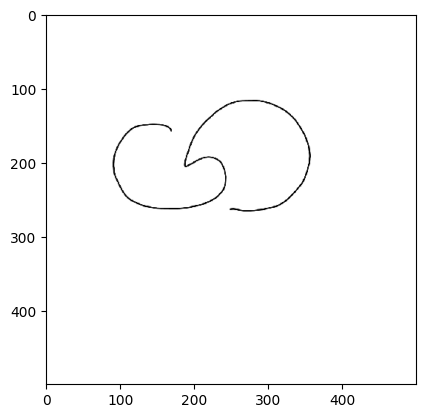

1/1 [==============================] - 0s 84ms/step
This is Letter 'Ga' in Sinhala


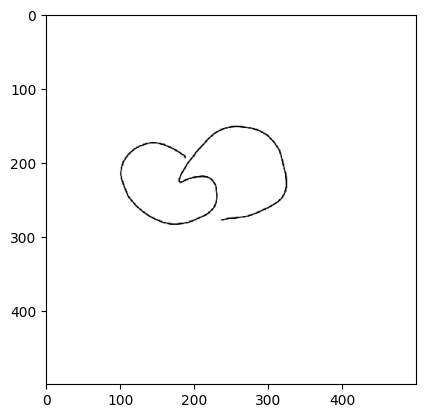

1/1 [==============================] - 0s 83ms/step
This is Letter 'Ga' in Sinhala


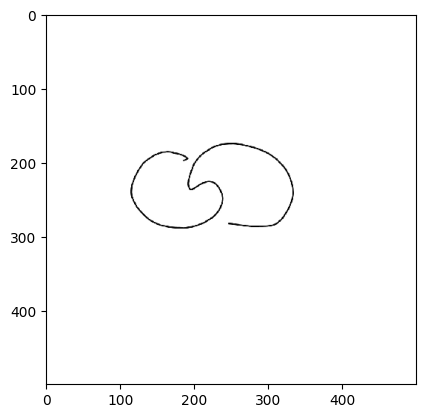

1/1 [==============================] - 0s 87ms/step
This is Letter 'Ga' in Sinhala


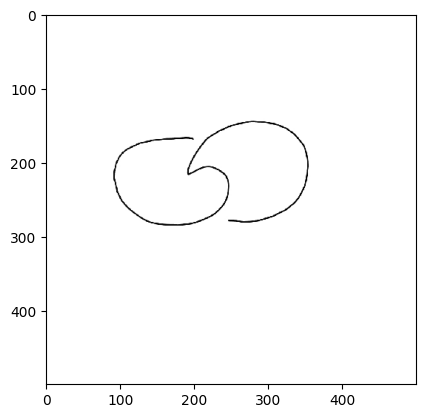

1/1 [==============================] - 0s 93ms/step
This is Letter 'Ga' in Sinhala


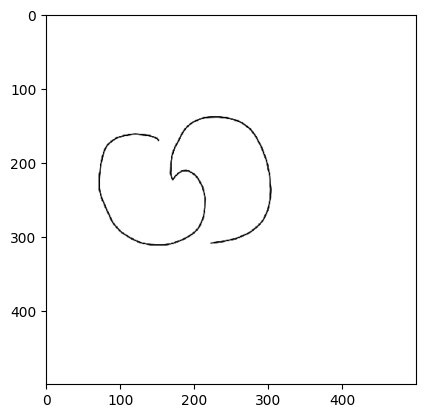

1/1 [==============================] - 0s 83ms/step
This is Letter 'Ga' in Sinhala


In [181]:
#Directory path containing the testing images
dir_path = 'Testing/'

#Loop over each file in the directory
for i in os.listdir(dir_path):
  # Loading the image and resize it to the target size
  img = image.load_img(dir_path+ i,target_size=(500,500))
  # Displaying the image using matplotlib
  plt.imshow(img)
  plt.show()

  #Converting the image to a NumPy array and adding an extra dimension
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
  #Stacking the array vertically to create a batch of images
  images = np.vstack([X])

  #Making a prediction using the trained model
  val = model.predict(images)

  #Checking the predicted value and printing the corresponding class label
  if val == 0:
    print("This is Letter 'Ga' in Sinhala")
  else:
    print("This is Letter 'Pa' in Sinhala")